# MAGIC BRICK DATASET

## MODELS USED:
## Linear Regression
## Decision Tree
## Random Forest
## Gradient Boosting

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MagicBricks.csv')

In [3]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Price Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Resale,Builder_Floor,12916.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            1259 non-null   float64
 1   BHK             1259 non-null   int64  
 2   Bathroom        1257 non-null   float64
 3   Furnishing      1254 non-null   object 
 4   Parking         1226 non-null   float64
 5   Price           1259 non-null   int64  
 6   Transaction     1259 non-null   object 
 7   Type            1254 non-null   object 
 8   Price Per_Sqft  1018 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 88.6+ KB


In [5]:
df.corr()

,Area,BHK,Bathroom,Parking,Price,Price Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Price Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


In [6]:
predict_df = df[df['Price Per_Sqft'].isnull()]

In [7]:
predict_df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Price Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,New_Property,Builder_Floor,NaN
30,1500.0,1,NaN,Unfurnished,NaN,13500000,Resale,Apartment,NaN
31,800.0,2,2.0,Unfurnished,1.0,15000000,New_Property,Builder_Floor,NaN
32,900.0,2,2.0,Unfurnished,1.0,10500000,New_Property,Builder_Floor,NaN
33,1080.0,3,2.0,Semi-Furnished,1.0,22500000,New_Property,Builder_Floor,NaN
...,...,...,...,...,...,...,...,...,...
1185,900.0,2,2.0,Unfurnished,2.0,15000000,Resale,Apartment,NaN
1199,2520.0,3,3.0,Unfurnished,NaN,47500000,New_Property,Builder_Floor,NaN
1200,1700.0,3,4.0,Unfurnished,2.0,45000000,New_Property,Builder_Floor,NaN
1229,2097.0,3,3.0,Unfurnished,NaN,29000000,Resale,Builder_Floor,NaN


In [8]:
predict_x = predict_df.drop('Price Per_Sqft', axis=1)
predict_x

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,New_Property,Builder_Floor
30,1500.0,1,NaN,Unfurnished,NaN,13500000,Resale,Apartment
31,800.0,2,2.0,Unfurnished,1.0,15000000,New_Property,Builder_Floor
32,900.0,2,2.0,Unfurnished,1.0,10500000,New_Property,Builder_Floor
33,1080.0,3,2.0,Semi-Furnished,1.0,22500000,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...
1185,900.0,2,2.0,Unfurnished,2.0,15000000,Resale,Apartment
1199,2520.0,3,3.0,Unfurnished,NaN,47500000,New_Property,Builder_Floor
1200,1700.0,3,4.0,Unfurnished,2.0,45000000,New_Property,Builder_Floor
1229,2097.0,3,3.0,Unfurnished,NaN,29000000,Resale,Builder_Floor


In [9]:
new_df = df[~df['Price Per_Sqft'].isnull()]

In [10]:
new_df = new_df.dropna()

In [11]:
new_df_y = new_df['Price Per_Sqft'] 

In [12]:
new_df_y.size

1005

In [13]:
new_df_x = new_df.drop('Price Per_Sqft', axis=1)

In [14]:
new_df_x

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,New_Property,Apartment
2,950.0,2,2.0,Furnished,1.0,15500000,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,New_Property,Builder_Floor
5,1300.0,4,3.0,Semi-Furnished,1.0,15500000,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,New_Property,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Resale,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,New_Property,Builder_Floor
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Resale,Builder_Floor


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = new_df['Price']

# Create y (only the target column)
y = new_df['Price Per_Sqft']

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X, y,
                    test_size=0.4,
                    random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(603,)
(603,)
(402,)
(402,)


In [19]:
print(X_train)

815       8500000
209     135000000
665      43200000
137      15500000
945      15000000
          ...    
953       2600000
103      46000000
1130      7800000
276      26000000
55       31500000
Name: Price, Length: 603, dtype: int64


In [20]:
from sklearn import datasets, linear_model, metrics


In [21]:
reg = linear_model.LinearRegression()
y_train = y_train.values.reshape(-1, 1)
reg.fit(X_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[  8500000 135000000  43200000  15500000  15000000   1200000  20000000
   3700000   3300000  21500000  11000000  25500000   9000000   5500000
  56000000   4000000   1800000   8500000   2000000  22000000   6500000
  13500000   5000000   3000000   4950000  30000000  21000000  10000000
   5000000  18500000  36200000  50000000  18500000  15800000  37500000
 190000000  19000000   3000000  12500000   8500000  18000000  18500000
   3600000  43500000   6000000   2600000  22000000   5800000   3500000
   8500000  28600000  22500000  22500000  31500000 220000000  28000000
   4500000   3700000   2300000  21000000  11500000  11000000   4000000
   7500000  24500000  13000000  16500000   1700000  34000000  39700000
  13000000  20500000  51000000 240000000   3500000   5500000   5500000
  45000000   9000000  14000000   2350000   3000000  12500000  30000000
  37500000  36500000   2900000  12500000   7000000  13500000   4370000
  29000000   3800000   4000000  19000000  75000000   5500000   4000000
   4000000  20000000   2700000   6600000   6200000   5900000  65000000
  22000000  24900000   5130000   5000000  10000000   2300000  24900000
 100000000  51000000  25900000   1500000  19000000   7500000   3500000
  12500000  72500000   1400000  10400000  14600000  16500000   8500000
  10000000  14800000   2000000  15500000   2500000   7500000   5890000
  19000000   9300000   3000000  26000000  12000000 180000000   3400000
  20900000   3500000   6500000   9000000   4400000  31000000  65000000
  37500000   3500000   1900000   4800000  74000000  65000000  25000000
   1500000  52500000  14500000   4500000  13500000  14000000  12500000
  30000000   4500000   3800000  52500000  16000000  55000000  14300000
  27500000   4500000  35000000   6000000   7500000   1700000  65000000
   2600000  17000000  14200000   4700000  10000000  29000000  20000000
  10700000  23500000  60000000  47500000  15000000  11000000  13500000
  22000000 160000000   2850000 170000000   2000000  44000000  20000000
  45000000  70000000   6000000  10000000   4500000   2800000   7400000
   6300000  12500000  16500000   3100000  25500000  90000000   4370000
   5130000  12500000  11000000  15000000  22500000  26000000  24000000
  15800000   2900000   3800000  55000000  37000000   3100000  62500000
  51100000  25000000  16000000  21900000  15000000   2400000  22500000
  18500000  20000000  27500000   2000000  70000000  14200000  10000000
   1700000  19000000   7000000  60000000  25500000   5100000  19000000
  15500000  37500000   3200000  19000000   9000000  19000000  31000000
   6500000  20000000   7000000   2200000  20000000  14000000   8000000
   3000000   1900000   4500000  26500000  52500000  18800000   2940000
  57500000  11500000  18500000  42100000  17000000   3100000  24000000
   6200000   8770000  43500000  60000000   5000000  75000000  17200000
   3500000   8000000  93000000  30000000   1550000   7500000  68900000
   2000000   7300000  13500000   9000000   6000000  35000000   3200000
  72500000   3300000   5000000   9000000   3800000   6700000  47500000
 120000000  36500000   5400000   3800000   3200000   8400000  55000000
   3500000   4700000  24500000   4700000  38500000  16300000 170000000
   3700000  13500000  30000000   5500000  23000000  25000000  32500000
  58000000  20000000  61500000   1700000  17500000  44000000  55000000
   2200000   7200000  12500000   8000000  13000000  80000000  21000000
  15000000  70000000  11500000   6000000  26500000  87500000  23000000
   1500000  11300000   5890000  11000000   7000000  85000000   4000000
   5500000  15600000 102500000   3000000  80000000  57500000   1500000
  25000000  22000000   7000000  70000000  21000000   6000000   5000000
  24000000  33500000  22500000   8000000   2400000  15000000  18000000
   7000000   6500000  21500000  12000000  15800000  24000000  21100000
  29000000   2500000   2500000  24700000  85000000   5600000  42500000
   2670000  70000000   5500000   8700000  15500000   2300000  58000000
   6500000  26500000   5300000   7000000  93000000   3500000  30000000
   6000000   6000000  16000000   3800000   1900000   2500000   7000000
  40000000  27500000   6800000  19000000   2000000  19000000  70000000
  29000000  10700000  29000000   2700000  24900000  38000000  42500000
   5200000   1650000   6000000  33700000  14000000   3700000   4500000
   7000000  25000000  16500000  40000000   4620000   2550000   1600000
  13000000  75000000  29000000   2200000   3800000   2350000   6200000
  20500000   6200000   4620000  17500000  30000000  42500000  10800000
  15500000  20000000  22500000   7200000  24000000   1750000   2200000
  16000000  17500000   7700000   2000000  13400000 160000000  35000000
   2500000  42500000  14500000  12000000  18000000   5500000   7000000
   6800000  35000000  24500000   3500000  20000000   6000000  26000000
  13000000  16100000  82500000   9000000  25500000  37500000  11600000
   7500000  55000000   9500000  43100000   8000000   1700000   2200000
   2800000  71000000  22500000  25000000  36500000   2150000  25000000
  24900000  28000000   9200000   7000000  22500000  12000000 135000000
   2500000   6500000  23000000  16500000  27500000   4100000   2000000
  27000000   7300000   2600000   1600000   9800000  10500000   2000000
   1700000   2700000  27500000  75000000   2300000  93000000   7000000
  15000000  16000000   4500000   5000000  18500000   4600000  10800000
   6000000   6800000   3400000  17500000   5130000  37500000  24800000
  55000000  28500000  34300000  20000000  15000000  12000000  40000000
   5700000   5500000   1500000  60000000   5500000   8500000  12000000
   4500000  70000000   5500000  20500000  17000000   7500000  13000000
  15000000  11500000   6800000   3950000  15000000  21000000  19500000
  28500000  38000000  17000000 135500000  39000000  38000000  15500000
  15600000   2100000  52100000  15000000  75100000  19000000   4200000
   1900000  26000000   9000000  70000000   7000000   7000000  55000000
   3600000  20000000 110000000   4000000   5000000  35000000  20000000
   4400000   4600000  28000000   2600000  46000000   7800000  26000000
  31500000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
from sklearn.model_selection import train_test_split

X = new_df['Price']

# Create y (only the target column)
y = new_df['Price Per_Sqft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Reshape X_train and X_test
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [23]:
   
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [0.00021626]
Variance score: 0.10941944161653794


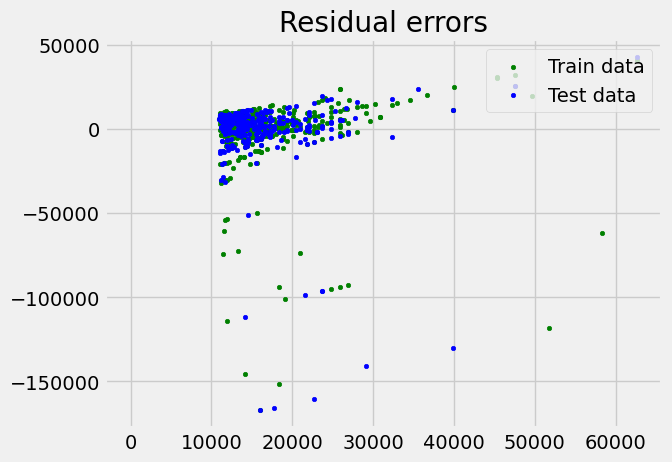

In [24]:
# plot for residual error
import matplotlib.pyplot as plt
# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
			reg.predict(X_train) - y_train,
			color="green", s=10,
			label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
			reg.predict(X_test) - y_test,
			color="blue", s=10,
			label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()


In [25]:
ans = reg.predict(X_test)

In [26]:
ans

array([11924.85697381, 11243.652269  , 13330.51747578, 16141.83847974,
       11927.01952843, 20466.94771659, 11124.71176499, 35604.83004556,
       22045.61258804, 14455.04587737, 20142.56452382, 12076.2357971 ,
       14498.29696973, 16249.96621066, 11124.71176499, 13654.90066855,
       16358.09394158, 11600.47378104, 18304.39309816, 13979.28386131,
       19385.67040737, 20466.94771659, 16120.21293355, 16682.47713434,
       11340.96722683, 11092.27344571, 13979.28386131, 11989.73361236,
       16682.47713434, 12032.98470473, 12898.0065521 , 32360.99811792,
       14519.92251592, 24792.05695344, 16249.96621066, 11254.4650421 ,
       62636.76277587, 17763.75444355, 11924.85697381, 11708.60151197,
       29117.16619028, 13330.51747578, 16358.09394158, 13871.15613039,
       17439.37125079, 17439.37125079, 13654.90066855, 15601.19982513,
       12141.11243565, 14844.30570868, 11643.72487341, 17223.11578895,
       11680.48830193, 15493.07209421, 12314.11680512, 11276.09058828,
      

In [27]:
training_score = reg.score(X_train, y_train)
print(training_score)

0.0993128448641053


In [28]:
test_accuracy = reg.score(X_test, y_test)
print(test_accuracy)

0.10941944161653794


In [29]:
print(f"intercept: {reg.intercept_}")


print(f"slope: {reg.coef_}")

intercept: 10735.451933674474
slope: [0.00021626]


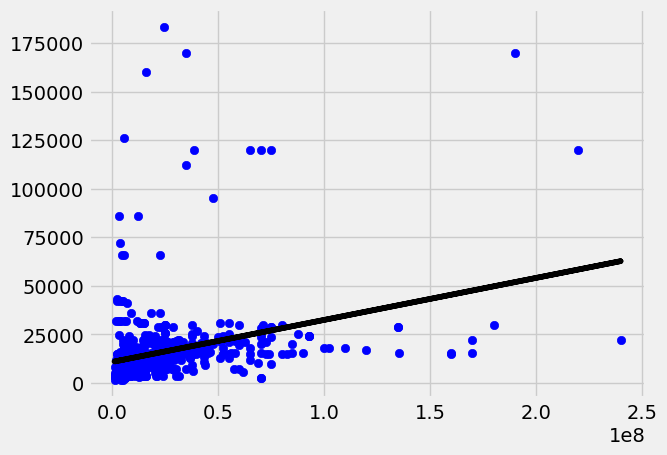

In [30]:
y_pred = reg.predict(X_test)
plt.scatter(X_train, y_train,color='b')
plt.plot(X_test, y_pred,color='k')

In [33]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [34]:
# Loading the dataset
data = pd.read_csv("MagicBricks.csv")

# Dropping rows with NaN values
data.dropna(inplace=True)

# Splitting the data into features (X) and target (y)
X = data.drop(columns=["Price Per_Sqft"])
y = data["Price Per_Sqft"]



In [35]:
# Encoding categorical variables
categorical_cols = ['Furnishing', 'Transaction', 'Type']
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_cols)],remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing different regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Training the models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [36]:
# Predicting on the test set
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree_reg.predict(X_test)
random_forest_pred = random_forest_reg.predict(X_test)
gradient_boosting_pred = gradient_boosting_reg.predict(X_test)

# Evaluating the models
print("Linear Regression MSE:", mean_squared_error(y_test, linear_reg_pred))
print("Decision Tree Regression MSE:", mean_squared_error(y_test, decision_tree_pred))
print("Random Forest Regression MSE:", mean_squared_error(y_test, random_forest_pred))
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, gradient_boosting_pred))


Linear Regression MSE: 595040329.3060105
Decision Tree Regression MSE: 932765196.8109453
Random Forest Regression MSE: 628071098.7268461
Gradient Boosting Regression MSE: 625928808.6087252


In [38]:
import matplotlib.pyplot as plt

# Creating a function to plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=2)
    plt.title(f"Actual vs Predicted Prices per Square Foot ({model_name})")
    plt.xlabel("Actual Price per Square Foot")
    plt.ylabel("Predicted Price per Square Foot")
    plt.grid(True)
    plt.show()




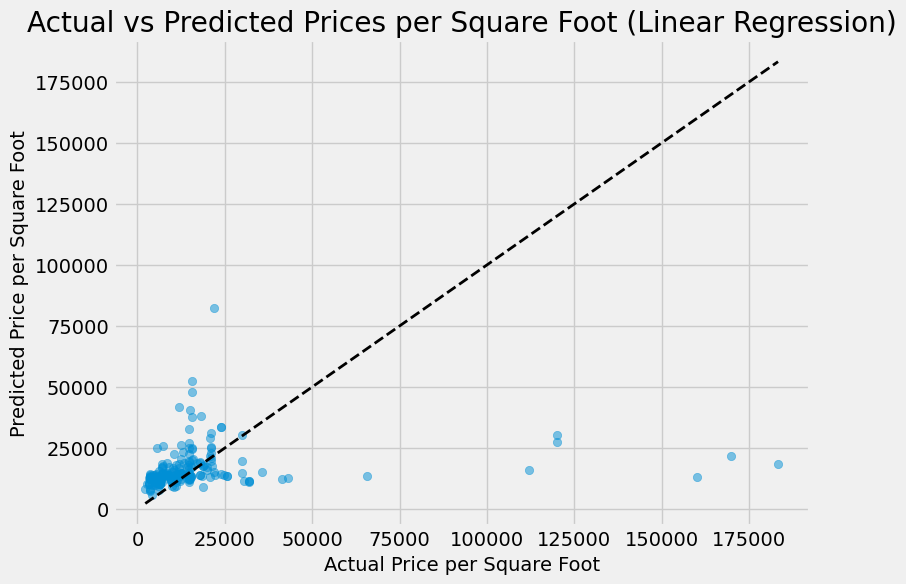

In [39]:
# Plotting actual vs predicted for Linear Regression
plot_actual_vs_predicted(y_test, linear_reg_pred, "Linear Regression")



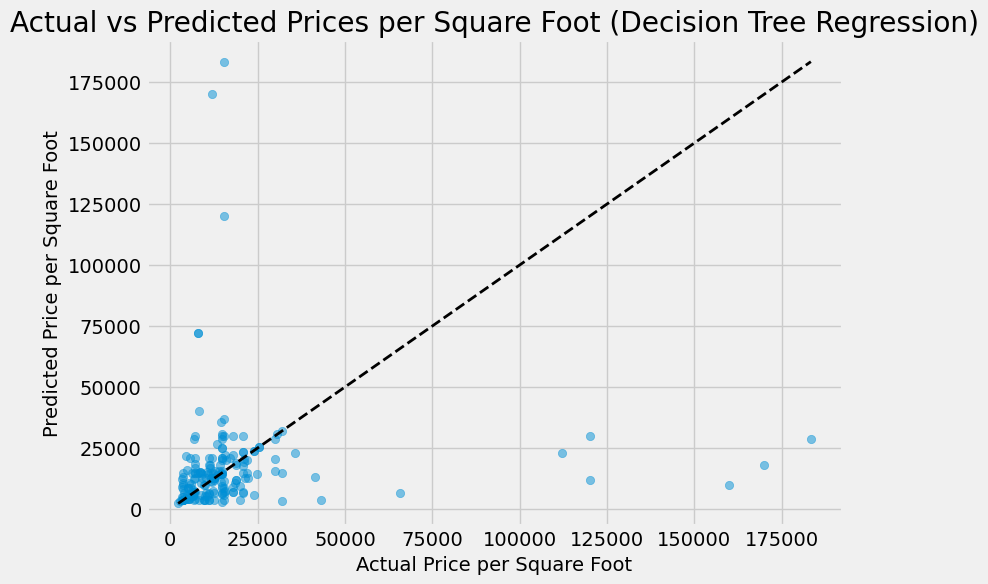

In [40]:
# Plotting actual vs predicted for Decision Tree Regression
plot_actual_vs_predicted(y_test, decision_tree_pred, "Decision Tree Regression")



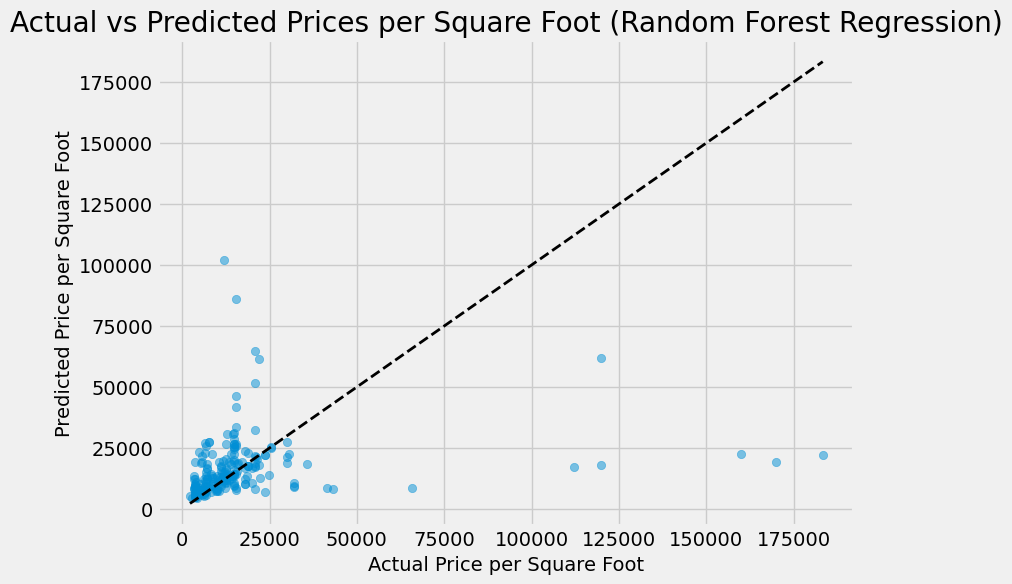

In [41]:
# Plotting actual vs predicted for Random Forest Regression
plot_actual_vs_predicted(y_test, random_forest_pred, "Random Forest Regression")



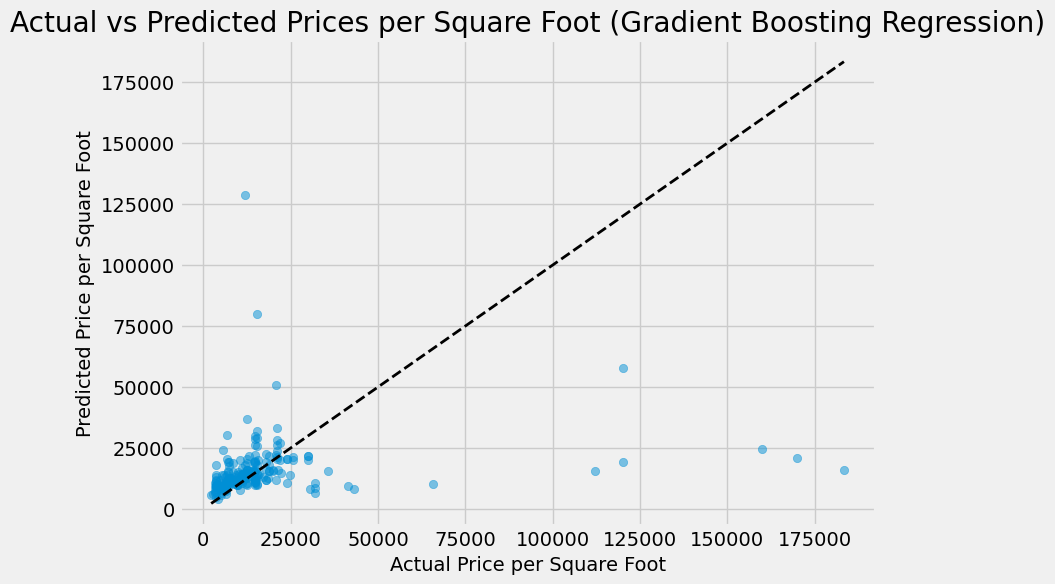

In [42]:
# Plotting actual vs predicted for Gradient Boosting Regression
plot_actual_vs_predicted(y_test, gradient_boosting_pred, "Gradient Boosting Regression")

In [43]:
import numpy as np

# Creating a function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title(f"Residuals Plot ({model_name})")
    plt.xlabel("Predicted Price per Square Foot")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()



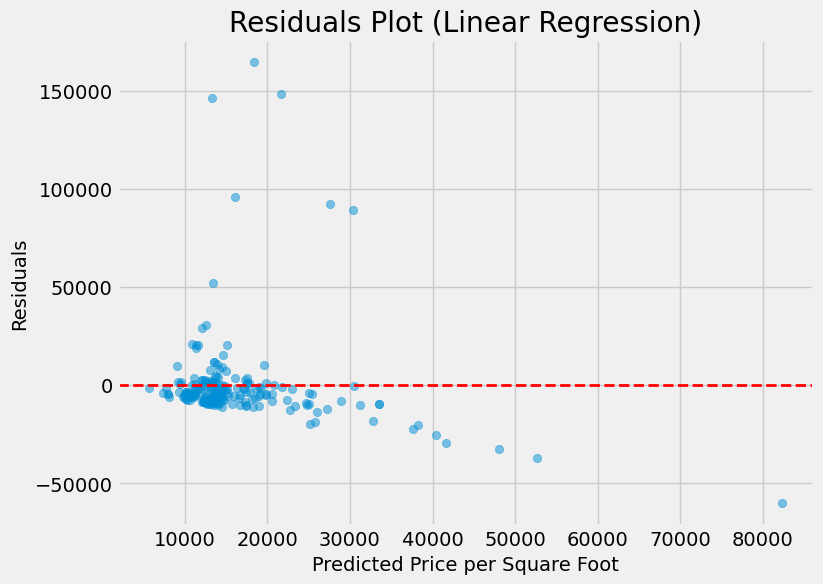

In [44]:
# Plotting residuals for Linear Regression
plot_residuals(y_test, linear_reg_pred, "Linear Regression")



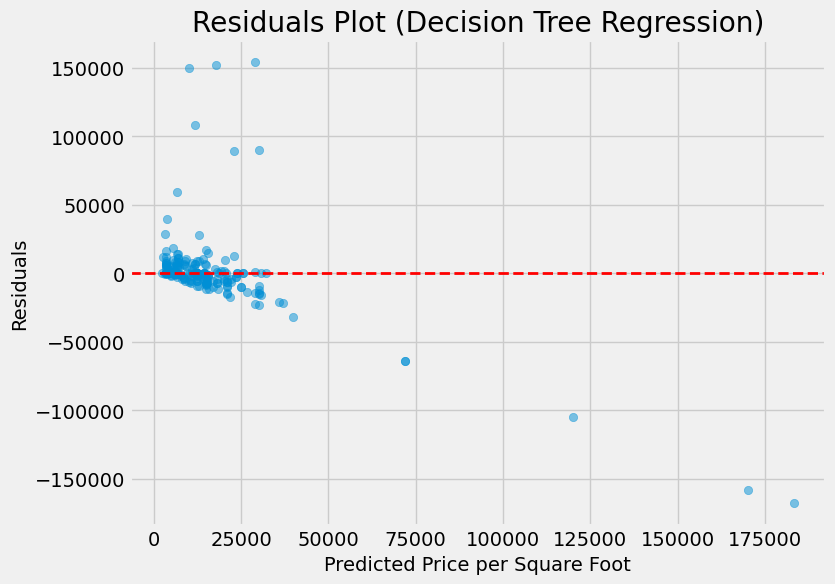

In [45]:
# Plotting residuals for Decision Tree Regression
plot_residuals(y_test, decision_tree_pred, "Decision Tree Regression")



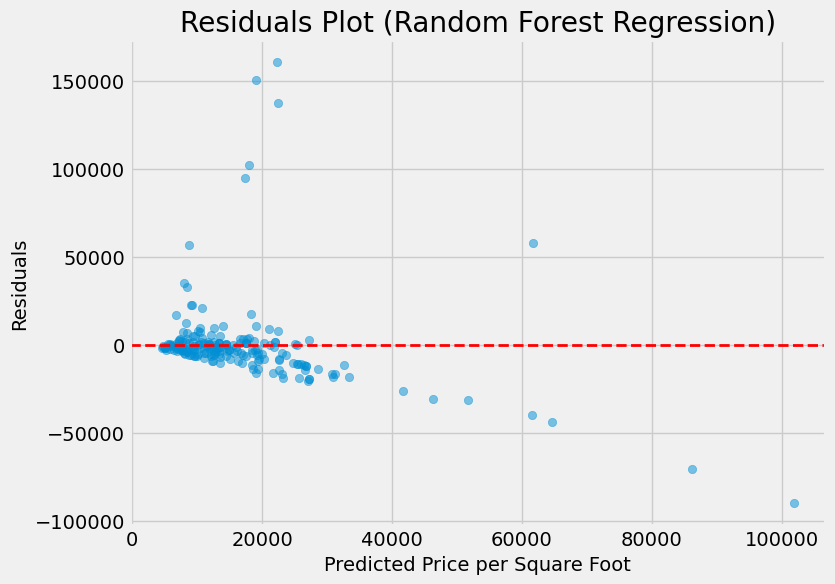

In [46]:
# Plotting residuals for Random Forest Regression
plot_residuals(y_test, random_forest_pred, "Random Forest Regression")



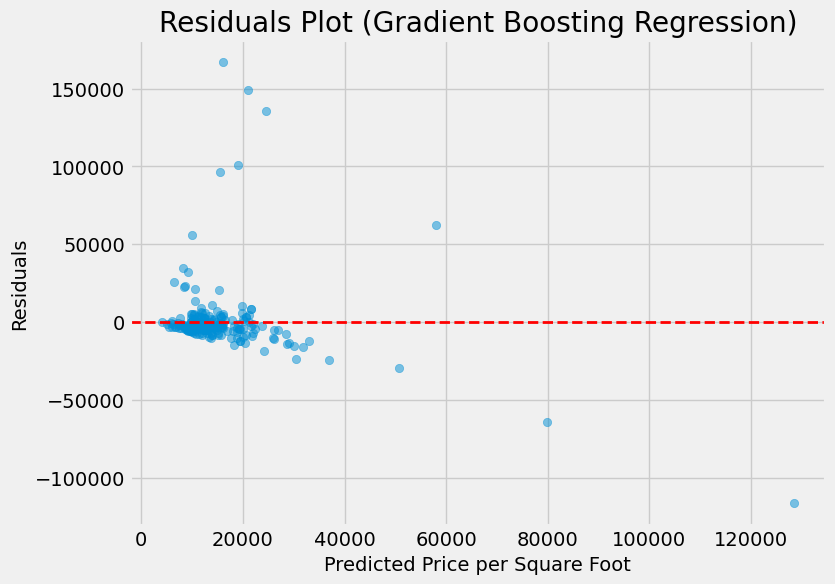

In [47]:
# Plotting residuals for Gradient Boosting Regression
plot_residuals(y_test, gradient_boosting_pred, "Gradient Boosting Regression")


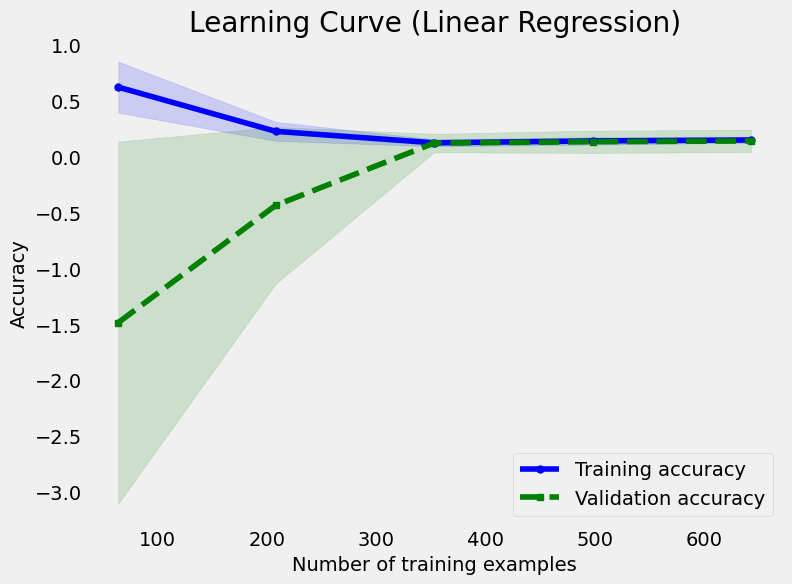

In [51]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title(f"Learning Curve ({model_name})")
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plotting learning curve for Linear Regression
plot_learning_curve(linear_reg, X_train, y_train, "Linear Regression")




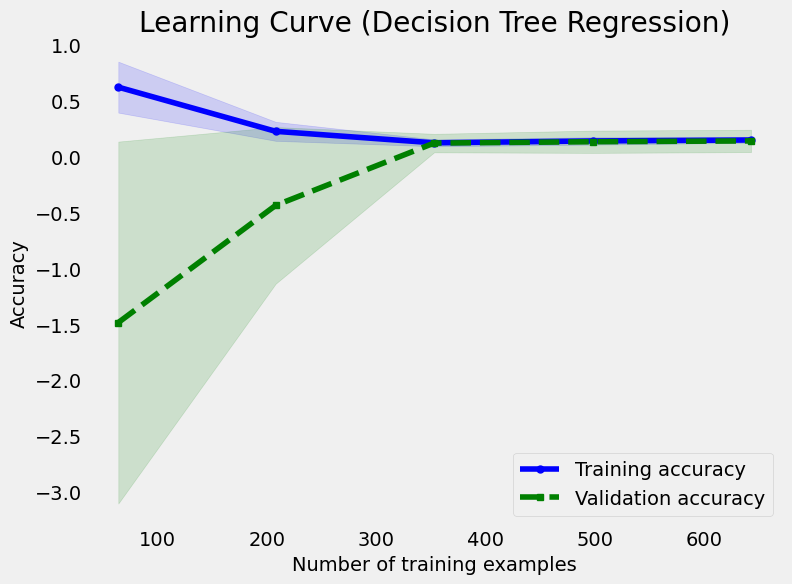

In [52]:
plot_learning_curve(linear_reg, X_train, y_train, "Decision Tree Regression")

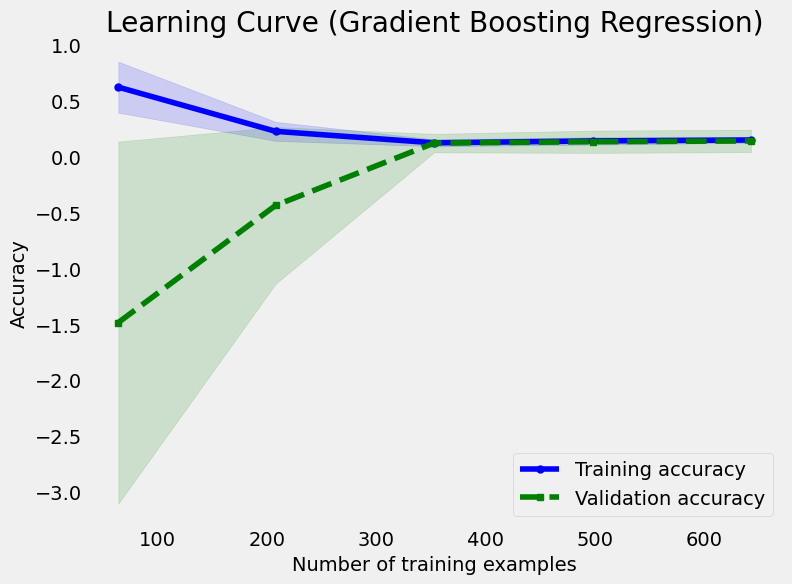

In [53]:
plot_learning_curve(linear_reg, X_train, y_train, "Gradient Boosting Regression")

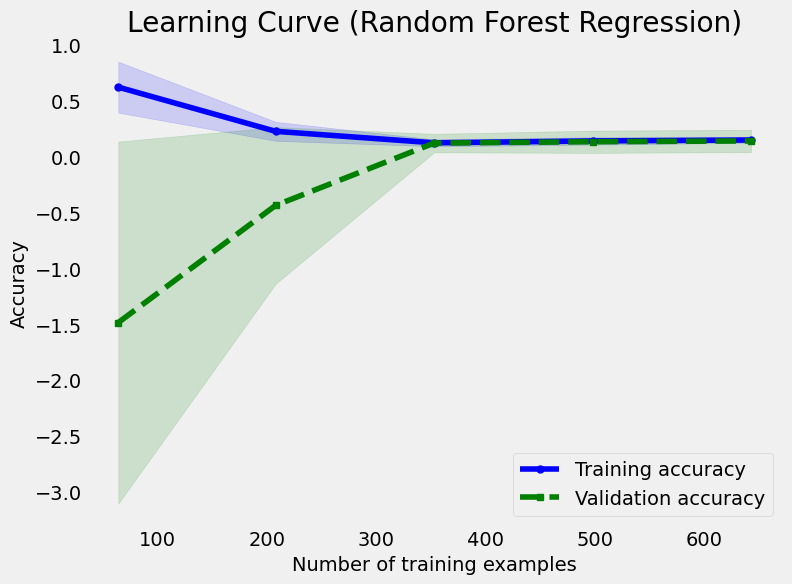

In [54]:
plot_learning_curve(linear_reg, X_train, y_train, "Random Forest Regression")